# Defend against attribute attacks in face recognition models

## Create an attack and defence using attribute modification - hair color and style, pose, make-up and else.




#### create conde env

In [2]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local/

--2023-01-17 14:27:02--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   124MB/s    in 0.8s    

2023-01-17 14:27:03 (124 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

#### install prerequisites

In [3]:
!yes | conda create -n stargan-v2 python=3.6.7
!yes | conda activate stargan-v2
!yes | conda install -y pytorch=1.4.0 torchvision=0.5.0 cudatoolkit=10.0 -c pytorch
!yes | conda install x264=='1!152.20180717' ffmpeg=4.0.2 -c conda-forge
!yes | pip install opencv-python==4.1.2.30 ffmpeg-python==0.2.0 scikit-image==0.16.2
!yes | pip install pillow==7.0.0 scipy==1.2.1 tqdm==4.43.0 munch==2.5.0

Solving environment: - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/stargan-v2

  added / updated specs:
    - python=3.6.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    libedit-3.1.20221030       |       h5eee18b_0         181 KB
    libffi-3.2.1               |    hf484d3e_1007          48 KB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgo

In [7]:
%pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached facenet_pytorch-2.5.2-py3-none-any.whl (1.9 MB)


In [1]:
'''General packages'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import cv2
from PIL import Image
import os
import time
from tqdm import *

import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import glob
from datetime import datetime
import argparse
torch.manual_seed(42)
from facenet_pytorch import MTCNN, InceptionResnetV1


plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# %cd "/content/drive/MyDrive/HW_Gil_Shelly/Deep_Learning/final_project"

Mounted at /content/drive


In [3]:
! git clone https://github.com/shellyfra/Defend-against-attribute-attacks-in-face-recognition-models.git

Cloning into 'Defend-against-attribute-attacks-in-face-recognition-models'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 200 (delta 75), reused 138 (delta 26), pack-reused 0
Receiving objects: 100% (200/200), 1.89 MiB | 1.99 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [32]:
%cd Defend_against_attribute_attacks_in_face_recognition_models

[Errno 2] No such file or directory: 'Defend_against_attribute_attacks_in_face_recognition_models'
/content/Defend-against-attribute-attacks-in-face-recognition-models/StarGAN_with_our_changes


In [5]:
from utils import train, set_parameter_requires_grad, eval_acc, imshow_no_normalization, get_params_to_update, imshow

In [6]:
%cd StarGAN_with_our_changes

/content/Defend-against-attribute-attacks-in-face-recognition-models/StarGAN_with_our_changes


#### create conde env and install prerequisites

In [ ]:
# ! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
# ! chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
# ! bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local/

In [ ]:
# !yes | conda create -n stargan-v2 python=3.6.7
# !yes | conda activate stargan-v2
# !yes | conda install -y pytorch=1.4.0 torchvision=0.5.0 cudatoolkit=10.0 -c pytorch
# !yes | conda install x264=='1!152.20180717' ffmpeg=4.0.2 -c conda-forge
# !yes | pip install opencv-python==4.1.2.30 ffmpeg-python==0.2.0 scikit-image==0.16.2
# !yes | pip install pillow==7.0.0 scipy==1.2.1 tqdm==4.43.0 munch==2.5.0

In [7]:
# Download the STARGAN pretrained model on celebA-HQ
!bash download.sh stargan-pre-trained
# Download an attention pretrained model for the usage of the generation
!bash download.sh wing

for details.

--2023-01-17 14:35:09--  https://www.dropbox.com/s/96fmei6c93o8b8t/100000_nets_ema.ckpt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/96fmei6c93o8b8t/100000_nets_ema.ckpt [following]
--2023-01-17 14:35:09--  https://www.dropbox.com/s/raw/96fmei6c93o8b8t/100000_nets_ema.ckpt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce7cd68748be58506439ae20455.dl.dropboxusercontent.com/cd/0/inline/B0sHH-c8-DyQzIE5pEa2l2O2lVIPTc56zbS67k1t8IQcJxiNTR2jKwmBJ-o8rBgrUTYagwOb4F8fJ7fX4hCLMFR8BBE-dQU1GUgCb4w28aShanfzXu4DVoC6jjGSDfmqF0eKhDbLd4EGfZH8Kn9uYquRw3dk0wOFi492AlIkaTbu7g/file# [following]
--2023-01-17 14:35:10--  https://uce7cd68748be58506439ae20455.dl.dropboxusercontent.com/cd/0/inline/B0sHH-c8-DyQzIE5pEa2l2O2lVIPTc56zbS67

In [8]:
# install our pre-trained models on celebA-HQ dataset (with / without augmentation and with attributes)
!bash download.sh models-weights

--2023-01-17 14:35:21--  https://docs.google.com/uc?export=download&confirm=t&id=1G5QNRswQjVNJ3gDTf0W8-vsiuFuVqDY_
Resolving docs.google.com (docs.google.com)... 108.177.13.100, 108.177.13.113, 108.177.13.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.13.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n7sg9v3etlp44a0o6h9dfhjsu46v718a/1673966100000/05560778185249539437/*/1G5QNRswQjVNJ3gDTf0W8-vsiuFuVqDY_?e=download&uuid=3adcc17b-fc32-44e9-b643-3f0cc0802345 [following]
--2023-01-17 14:35:21--  https://doc-14-08-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n7sg9v3etlp44a0o6h9dfhjsu46v718a/1673966100000/05560778185249539437/*/1G5QNRswQjVNJ3gDTf0W8-vsiuFuVqDY_?e=download&uuid=3adcc17b-fc32-44e9-b643-3f0cc0802345
Resolving doc-14-08-docs.googleusercontent.com (doc-14-08-docs.googleusercontent.com)... 173.194.217.132,

In [ ]:
!bash download.sh celeba-hq-dataset

## Attack a specific identity on facenet model 

In [10]:
parser = argparse.ArgumentParser()
parser.add_argument('model_path', type=str, default=r'/content/Defend-against-attribute-attacks-in-face-recognition-models/StarGAN_with_our_changes/', help='the path to save model weights after training')
parser.add_argument('image_size', type=int, default=256, help='the image size to enter the face recognition model') # 256 is the size for FaceNet
parser.add_argument('lr', type=float, default=0.001, help='the learning rate used for train on CelebA data')
parser.add_argument('momentum', type=float, default=0.9, help='the momentum used for train on CelebA data')
parser.add_argument('train_celebA_num_epochs', type=int, default=20, help='the number of epochs used for the first train phase on CelebA data with no augmentation')
parser.add_argument('batch_size', type=int, default=16, help='train and test batch size')
parser.add_argument('num_workers', type=int, default=2, help='train and test num workers')
parser.add_argument('num_epochs', type=int, default=20, help='the number of epochs used for the first train phase on CelebA data with no augmentation')


args = parser.parse_args(args=['/content/Defend-against-attribute-attacks-in-face-recognition-models/StarGAN_with_our_changes/', '256', '1e-3', '0.9', '20', '16', '2', '20'])
print(args)

Namespace(batch_size=16, image_size=256, lr=0.001, model_path='/content/Defend-against-attribute-attacks-in-face-recognition-models/StarGAN_with_our_changes/', momentum=0.9, num_epochs=20, num_workers=2, train_celebA_num_epochs=20)


In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [12]:
!python main.py --mode sample --num_domains 2 --resume_iter 100000 --w_hpf 1 \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --result_dir attack_objects\
               --src_dir attack_objects \
               --ref_dir attack_reference \
               --skip_rate 1


Start_sampling sample: 0
/usr/local/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [13]:
transforms_orig = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    ])

transforms_train = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])

transforms_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [14]:
data_dir = './CelebA_HQ_facial_identity_dataset'
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, num_workers=args.batch_size)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=args.batch_size, shuffle=True, num_workers=args.batch_size)

print('Train dataset size:', len(train_dataset))
print('Test dataset size:', len(test_dataset))

class_names = train_dataset.classes
print('Class names:', class_names)

Train dataset size: 4263
Test dataset size: 1215
Class names: ['102', '1027', '103', '104', '1041', '1043', '1044', '1047', '1052', '1060', '1077', '1079', '108', '1081', '1087', '1090', '1093', '1109', '111', '1112', '112', '1120', '1126', '1133', '1140', '1145', '1149', '1157', '1158', '116', '1191', '121', '1210', '122', '1220', '1237', '124', '125', '1256', '1262', '1268', '1269', '128', '1280', '1285', '129', '1291', '1293', '1307', '1317', '1330', '1335', '1350', '1351', '1370', '1396', '14', '1407', '1427', '1429', '143', '1435', '1440', '1452', '146', '1507', '1515', '1521', '1531', '1538', '1550', '158', '1581', '1584', '1595', '161', '162', '17', '1718', '1730', '175', '177', '1775', '1781', '179', '1796', '180', '1800', '181', '182', '1823', '183', '1837', '1838', '1848', '188', '1904', '1930', '194', '195', '196', '1965', '1972', '1974', '198', '1989', '199', '2020', '203', '2037', '204', '205', '206', '2076', '208', '2116', '2120', '213', '2131', '218', '2193', '2214', '22

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [15]:
num_classes = len(class_names) # clebA HQ sub dataset

celebA_facenet = InceptionResnetV1(pretrained='vggface2').to(device)
celebA_facenet = set_parameter_requires_grad(celebA_facenet, num_classes)

model_name = 'CelebA_HQ_Facenet_without_aug.pth'
state = torch.load(f'{args.model_path}/models/{model_name}', map_location=device)

celebA_facenet.load_state_dict(state['net'])
celebA_facenet = celebA_facenet.to(device).eval()
celebA_facenet.classify = True

source_images = {108:'1919.jpg', 188: '12236.jpg', 563:'5103.jpg', 701: '11670.jpg', 80:'13726.jpg'}
reference_images = {129: '10178.jpg', }
id_to_attack = [f'attack_objects/{id}/{img_name}' for id, img_name in source_images.items()] 
reference_img_paths = [f'attack_reference/{id}/{img_name}' for id, img_name in reference_images.items()] 
id_after_attack = [f'attack_objects/{i}/new_image_{i}_{0}_{m}.jpg' for m, i in enumerate(source_images.keys()) for k, j in enumerate(reference_images.keys())]


  0%|          | 0.00/107M [00:00<?, ?B/s]

In [16]:
def test_attack(state, celebA_facenet=celebA_facenet):
    num_classes = len(class_names) # clebA HQ sub dataset
    # print(num_classes)
    from facenet_pytorch import MTCNN, InceptionResnetV1
    facenet = InceptionResnetV1(pretrained='vggface2').to(device)
    facenet = set_parameter_requires_grad(celebA_facenet, num_classes)

    facenet.load_state_dict(state['net'])
    facenet = facenet.to(device)
    facenet.classify = True
    facenet.eval()
    id_to_attack_imgs = [transforms_orig(Image.open(img_path).convert('RGB')) for img_path in id_to_attack]
    reference_imgs = [transforms_orig(Image.open(img_path).convert('RGB')) for img_path in reference_img_paths]
    id_after_attack_imgs = [transforms_orig(Image.open(img_path).convert('RGB')) for img_path in id_after_attack]
    # print(len(id_after_attack_imgs))
    input = torch.stack(id_to_attack_imgs)

    facenet.eval()
    facenet.classify = True

    img_probs = celebA_facenet(input.to(device))
    out0 = torchvision.utils.make_grid(input)
    imshow_no_normalization(out0, title=f'predicted class = {[class_names[prob.argmax().item()] for prob in img_probs]}') # title=[x for x in img_probs.argmax(axis=1)]

    input = torch.stack(id_after_attack_imgs)
    img_probs = celebA_facenet(input.to(device))
    out0 = torchvision.utils.make_grid(input)
    imshow_no_normalization(out0, title=f'predicted class = {[class_names[prob.argmax().item()] for prob in img_probs]}') # title=[x for x in img_probs.argmax(axis=1)]

## Create augmentations for each image in the train dataset

In [17]:
!python main.py --mode sample --resume_iter 100000 --w_hpf 1 \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --result_dir CelebA_HQ_facial_identity_dataset/train \
               --src_dir CelebA_HQ_facial_identity_dataset/train \
               --ref_dir defence_reference \
               --val_batch_size 4096 \
               --skip_rate 4


Start_sampling sample: 0
/usr/local/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [26]:
!python main.py --mode sample --resume_iter 100000 --w_hpf 1 \
               --checkpoint_dir expr/checkpoints/celeba_hq \
               --result_dir CelebA_HQ_facial_identity_dataset/test \
               --src_dir CelebA_HQ_facial_identity_dataset/test \
               --ref_dir defence_reference \
               --val_batch_size 4096 \
               --skip_rate 16

Start_sampling sample: 0
/usr/local/lib/python3.7/site-packages/torch/nn/functional.py:2506: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [18]:
data_dir = './CelebA_HQ_facial_identity_dataset'
attr_aug_train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
attr_aug_test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

attr_aug_train_dataloader = torch.utils.data.DataLoader(attr_aug_train_dataset, batch_size=args.batch_size, shuffle=True, num_workers=args.num_workers)
attr_aug_test_dataloader = torch.utils.data.DataLoader(attr_aug_test_dataset, batch_size=args.batch_size, shuffle=True, num_workers=args.num_workers)

In [19]:
celebA_facenet_attr_aug = InceptionResnetV1(pretrained='vggface2').to(device)
celebA_facenet_attr_aug = set_parameter_requires_grad(celebA_facenet_attr_aug, num_classes)
params_to_update2 = get_params_to_update(celebA_facenet_attr_aug)
optimizer2 = torch.optim.SGD(params_to_update2, lr=args.lr, momentum=args.momentum)
criterion = nn.CrossEntropyLoss()

	 logits.weight
	 logits.bias


In [27]:
attr_aug_train_losses, attr_aug_test_losses, attr_aug_train_acc, attr_aug_test_acc = train(celebA_facenet_attr_aug, criterion, optimizer2, 
                                                                       args.num_epochs, attr_aug_train_dataloader, attr_aug_train_dataset, attr_aug_test_dataloader,
                                                                        attr_aug_test_dataset, args.model_path, with_aug=True, free_text='attr', device=device)



395it [00:57,  6.93it/s]

[Train #0] Loss: 4.7956 Acc: 20.4880% Time: 57.1119s


[Test #0] Loss: 3.3178 Acc: 68.5597% Time: 70.5753s
==> Saving model ...


395it [00:51,  7.62it/s]

[Train #1] Loss: 3.1874 Acc: 59.8479% Time: 122.8229s


[Test #1] Loss: 1.9031 Acc: 88.7243% Time: 136.0999s
==> Saving model ...


395it [00:51,  7.65it/s]

[Train #2] Loss: 2.2668 Acc: 72.1280% Time: 188.1099s


[Test #2] Loss: 1.1803 Acc: 93.3333% Time: 201.6838s
==> Saving model ...


395it [00:52,  7.55it/s]

[Train #3] Loss: 1.7624 Acc: 77.9908% Time: 254.4004s


[Test #3] Loss: 0.8130 Acc: 95.2263% Time: 270.3021s
==> Saving model ...


395it [00:50,  7.76it/s]

[Train #4] Loss: 1.4840 Acc: 80.0824% Time: 321.6138s


[Test #4] Loss: 0.6315 Acc: 95.3086% Time: 334.9270s
==> Saving model ...


395it [00:50,  7.80it/s]

[Train #5] Loss: 1.2910 Acc: 81.7620% Time: 385.9962s


[Test #5] Loss: 0.5267 Acc: 96.2140% Time: 399.1820s
==> Saving model ...


395it [00:50,  7.84it/s]

[Train #6] Loss: 1.1659 Acc: 82.9662% Time: 449.9668s


[Test #6] Loss: 0.4437 Acc: 96.3786% Time: 463.3270s
==> Saving model ...


395it [00:50,  7.82it/s]

[Train #7] Loss: 1.0725 Acc: 84.2814% Time: 514.2611s


[Test #7] Loss: 0.4045 Acc: 96.4609% Time: 527.5957s
==> Saving model ...


395it [00:50,  7.76it/s]

[Train #8] Loss: 0.9906 Acc: 85.5490% Time: 578.8737s


[Test #8] Loss: 0.3687 Acc: 96.5432% Time: 592.3353s
==> Saving model ...


395it [00:54,  7.26it/s]

[Train #9] Loss: 0.9348 Acc: 85.9293% Time: 647.1222s


[Test #9] Loss: 0.3455 Acc: 96.7901% Time: 660.5774s
==> Saving model ...


395it [00:52,  7.55it/s]

[Train #10] Loss: 0.8807 Acc: 86.5948% Time: 713.3270s


[Test #10] Loss: 0.3163 Acc: 96.4609% Time: 726.9412s
==> Saving model ...


395it [00:52,  7.59it/s]

[Train #11] Loss: 0.8354 Acc: 87.0702% Time: 779.3692s


[Test #11] Loss: 0.3027 Acc: 96.7901% Time: 792.9266s
==> Saving model ...


395it [00:52,  7.50it/s]

[Train #12] Loss: 0.7794 Acc: 88.1952% Time: 846.0181s


[Test #12] Loss: 0.2910 Acc: 96.6255% Time: 859.4800s
==> Saving model ...


395it [00:51,  7.60it/s]

[Train #13] Loss: 0.7556 Acc: 88.5280% Time: 911.8578s


[Test #13] Loss: 0.2858 Acc: 96.7078% Time: 925.3744s
==> Saving model ...


395it [00:55,  7.17it/s]

[Train #14] Loss: 0.7277 Acc: 88.9241% Time: 980.8561s


[Test #14] Loss: 0.2734 Acc: 96.7901% Time: 994.3777s
==> Saving model ...


395it [00:51,  7.62it/s]

[Train #15] Loss: 0.7048 Acc: 88.6389% Time: 1046.6324s


[Test #15] Loss: 0.2677 Acc: 96.6255% Time: 1060.2607s
==> Saving model ...


395it [00:51,  7.64it/s]

[Train #16] Loss: 0.6698 Acc: 89.2410% Time: 1112.3308s


[Test #16] Loss: 0.2561 Acc: 96.7078% Time: 1125.9034s
==> Saving model ...


395it [00:51,  7.67it/s]

[Train #17] Loss: 0.6536 Acc: 89.7322% Time: 1177.7998s


[Test #17] Loss: 0.2577 Acc: 96.6255% Time: 1191.4546s
==> Saving model ...


395it [00:51,  7.64it/s]

[Train #18] Loss: 0.6330 Acc: 89.9857% Time: 1243.5673s


[Test #18] Loss: 0.2429 Acc: 96.7901% Time: 1256.9567s
==> Saving model ...


395it [00:52,  7.45it/s]

[Train #19] Loss: 0.6138 Acc: 90.3026% Time: 1310.3498s


[Test #19] Loss: 0.2510 Acc: 96.7078% Time: 1325.1687s
==> Saving model ...
==> Finished Training ...


In [34]:
# attr_aug_test_acc = np.array([t.cpu().item() for t in attr_aug_test_acc])
# attr_aug_train_acc = np.array([t.cpu().item() for t in attr_aug_train_acc])
attr_aug_test_losses = np.array(attr_aug_test_losses)
attr_aug_train_losses = np.array(attr_aug_train_losses)

np.save(args.model_path + r'/models/attr_aug_test_acc.npy', attr_aug_test_acc)
np.save(args.model_path + r'/models/attr_aug_train_acc.npy', attr_aug_train_acc)
np.save(args.model_path + r'/models/attr_aug_test_losses.npy', attr_aug_test_losses)
np.save(args.model_path + r'/models/attr_aug_train_losses.npy', attr_aug_train_losses)

In [35]:
# if nessecary
attr_aug_test_acc = np.load(args.model_path + r'/models/attr_aug_test_acc.npy')
attr_aug_train_acc = np.load(args.model_path + r'/models/attr_aug_train_acc.npy')
attr_aug_test_losses = np.load(args.model_path + r'/models/attr_aug_test_losses.npy')
attr_aug_train_losses = np.load(args.model_path + r'/models/attr_aug_train_losses.npy')

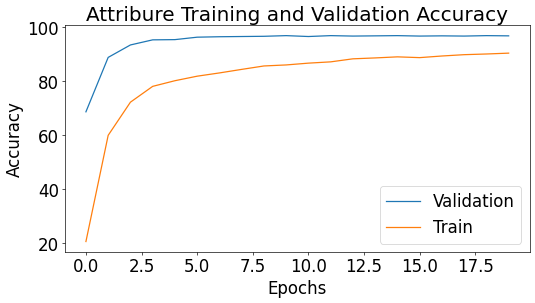

In [36]:
plt.figure(figsize=(10,5))
plt.title("Attribure Training and Validation Accuracy")
plt.plot(attr_aug_test_acc,label="Validation")
plt.plot(attr_aug_train_acc,label="Train")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

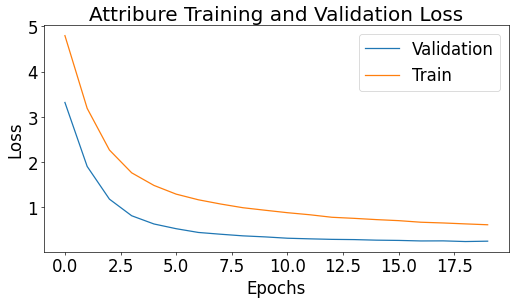

In [37]:
plt.figure(figsize=(10,5))
plt.title("Attribure Training and Validation Loss")
plt.plot(attr_aug_test_losses,label="Validation")
plt.plot(attr_aug_train_losses,label="Train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ***The identities BEFORE the defence***

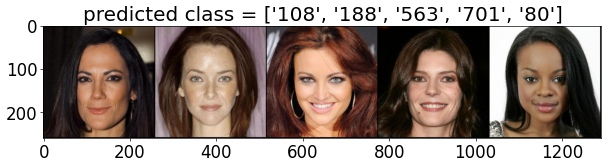

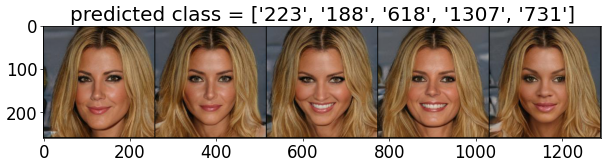

In [21]:
model_name = 'CelebA_HQ_Facenet_without_aug.pth'
path_name = f'{args.model_path}/models/{model_name}'
old_state = torch.load(path_name, map_location=device)
test_attack(old_state)


# ***The identities AFTER the defence***

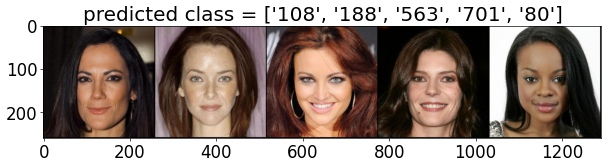

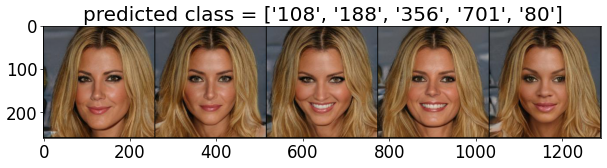

In [22]:
model_name = 'CelebA_HQ_Facenet_with_aug_attribute.pth'
path_name = f'{args.model_path}/models/{model_name}'
new_state = torch.load(path_name, map_location=device)
test_attack(new_state)